In [1]:
import jax
jax.config.update("jax_enable_x64", True)

import h5py
import numpy as np
import scipy.optimize
import jax.numpy as jnp
import fitsio
from scipy.stats import gaussian_kde

import proplot as pplt

In [2]:
d = fitsio.read("/Users/beckermr/Desktop/input_cosmos_v4_montara_simcat_v7_seed42.fits")

In [3]:
d.shape

(223007,)

In [4]:
ds = h5py.File("/Users/beckermr/Desktop/sompz_y6_imsim_400Tile.hdf5")
zlow = ds["catalog/sompz/pzdata/zlow"][:]
zhigh = ds["catalog/sompz/pzdata/zhigh"][:]

In [5]:
z_be = np.concatenate([zlow[0:1], zhigh])
z_val = (zlow + zhigh) / 2.0

In [14]:
z_be

array([-0.005,  0.005,  0.015,  0.025,  0.035,  0.045,  0.055,  0.065,
        0.075,  0.085,  0.095,  0.105,  0.115,  0.125,  0.135,  0.145,
        0.155,  0.165,  0.175,  0.185,  0.195,  0.205,  0.215,  0.225,
        0.235,  0.245,  0.255,  0.265,  0.275,  0.285,  0.295,  0.305,
        0.315,  0.325,  0.335,  0.345,  0.355,  0.365,  0.375,  0.385,
        0.395,  0.405,  0.415,  0.425,  0.435,  0.445,  0.455,  0.465,
        0.475,  0.485,  0.495,  0.505,  0.515,  0.525,  0.535,  0.545,
        0.555,  0.565,  0.575,  0.585,  0.595,  0.605,  0.615,  0.625,
        0.635,  0.645,  0.655,  0.665,  0.675,  0.685,  0.695,  0.705,
        0.715,  0.725,  0.735,  0.745,  0.755,  0.765,  0.775,  0.785,
        0.795,  0.805,  0.815,  0.825,  0.835,  0.845,  0.855,  0.865,
        0.875,  0.885,  0.895,  0.905,  0.915,  0.925,  0.935,  0.945,
        0.955,  0.965,  0.975,  0.985,  0.995,  1.005,  1.015,  1.025,
        1.035,  1.045,  1.055,  1.065,  1.075,  1.085,  1.095,  1.105,
      

<a list of 1 Line2D objects>

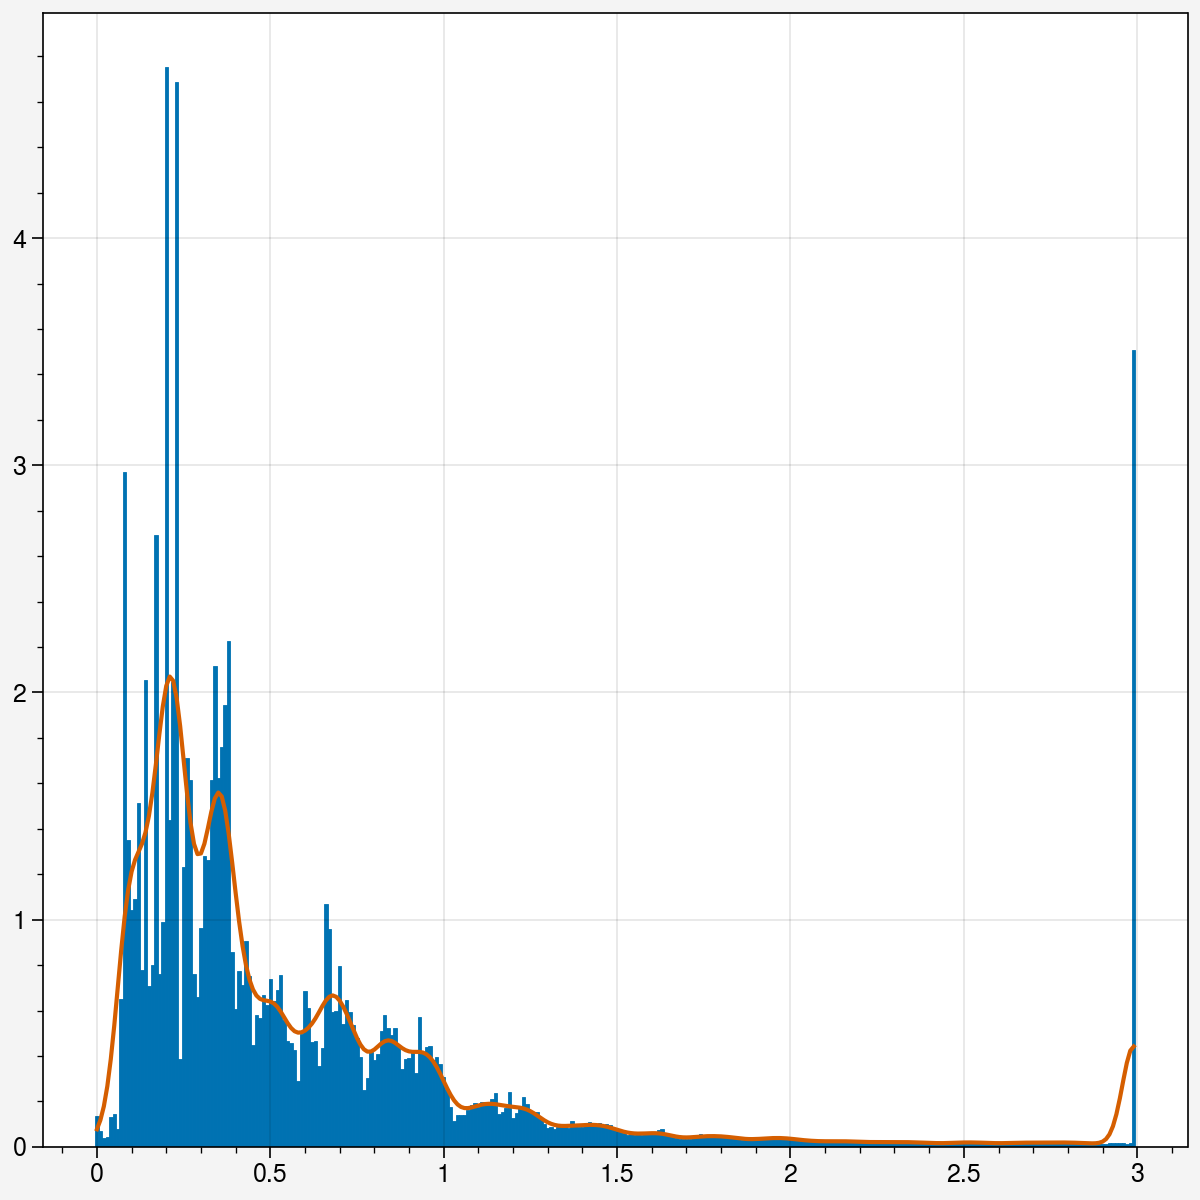

In [15]:
wgt = d["flux_r"] + d["flux_i"] + d["flux_z"]

msk = d["photoz"] > 2.99
d["photoz"][msk] = 2.99

msk = d["photoz"] <= 3.0

kde = gaussian_kde(
    d["photoz"][msk],
    weights=wgt[msk],
    bw_method=0.05,
)

fig, axs = pplt.subplots(figsize=(6, 6))

ax = axs[0, 0]
h, be, _ = ax.hist(
    d["photoz"],
    bins=z_be,
    density=True,
    weights=wgt,
)
kde_vals = kde.evaluate(z_val)
ax.plot(z_val, kde_vals)


In [7]:
h[0] = 0.0
h = h / h.sum() / 0.01

h.sum()*0.01

1.0000000000000002

In [8]:
fitsio.write("gtemplate_hist_input_cosmos_v4_montara_simcat_v7_seed42.fits", h, clobber=True)

In [15]:
h

array([0.        , 0.07357269, 0.04144495, 0.04716873, 0.13497737,
       0.15113352, 0.08032746, 0.6763368 , 3.08229478, 1.40066704,
       1.08022809, 1.13240298, 1.56979355, 0.8056257 , 2.13085256,
       0.73490781, 0.82937835, 2.79326472, 0.78989048, 1.02830903,
       4.93469563, 1.49296567, 2.12113   , 4.86320227, 0.40055684,
       1.27967162, 1.77483015, 1.67678962, 0.79168667, 0.68660956,
       1.00059222, 1.32911608, 1.3094135 , 1.67509146, 2.19565736,
       1.68272676, 1.8278239 , 2.01967052, 2.31094884, 0.8912197 ,
       0.62753701, 0.80097969, 0.7401859 , 0.93904417, 0.77945397,
       0.46577696, 0.60308055, 0.59060266, 0.69294554, 0.648369  ,
       0.76781554, 0.66611127, 0.71854175, 0.78331368, 0.58017585,
       0.48295985, 0.47488454, 0.44103787, 0.30164353, 0.51568479,
       0.70971155, 0.63539341, 0.47718154, 0.48440872, 0.36744416,
       0.44961394, 1.1084875 , 0.9931591 , 0.61668847, 0.62128452,
       0.82409833, 0.55884677, 0.66944163, 0.61781953, 0.55752